In [19]:
# general imports
import pandas as pd
import numpy as np

# display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# custom helper functions
%load_ext autoreload
%autoreload 2
from src.helper.general_helper import *


# view plotly in jupyter 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
app_df = getDF('../data/reviews_Apps_for_Android_5.json.gz')

In [24]:
meta_df = getDF('../data/meta_Apps_for_Android.json.gz')

In [26]:
meta_df.head()

,asin,related,categories,salesRank,price
0,B004A9SDD8,"{'also_bought': ['B006M3K874', 'B00F85SMOI', '...","[[Apps for Android, Kids]]",NaN,NaN
1,B004AFQAUA,"{'also_bought': ['B005UDD1R6', 'B00LBH2UMM', '...","[[Apps for Android, Music, Music Players]]",NaN,NaN
2,B004AGCR1K,"{'also_viewed': ['B00A7W29BE', 'B00I5PB9UM', '...","[[Apps for Android, Productivity]]",NaN,NaN
3,B004AHBBPW,"{'also_bought': ['B006T2U1V6', 'B00FBCIYZU', '...","[[Apps for Android, Reference]]",NaN,NaN
4,B004ALFHV2,"{'also_bought': ['B00CA6LZAG', 'B00FE5ZF4W', '...","[[Apps for Android, Communication]]",NaN,NaN


In [30]:
app_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1N4O8VOJZTDVB,B004A9SDD8,Annette Yancey,"[1, 1]","Loves the song, so he really couldn't wait to ...",3.0,Really cute,1383350400,"11 2, 2013"
1,A2HQWU6HUKIEC7,B004A9SDD8,"Audiobook lover ""Kathy""","[0, 0]","Oh, how my little grandson loves this app. He'...",5.0,2-year-old loves it,1323043200,"12 5, 2011"
2,A1SXASF6GYG96I,B004A9SDD8,Barbara Gibbs,"[0, 0]",I found this at a perfect time since my daught...,5.0,Fun game,1337558400,"05 21, 2012"
3,A2B54P9ZDYH167,B004A9SDD8,"Brooke Greenstreet ""Babylove""","[3, 4]",My 1 year old goes back to this game over and ...,5.0,We love our Monkeys!,1354752000,"12 6, 2012"
4,AFOFZDTX5UC6D,B004A9SDD8,C. Galindo,"[1, 1]",There are three different versions of the song...,5.0,This is my granddaughters favorite app on my K...,1391212800,"02 1, 2014"


#### Questions
* top 10 most reviewed products
* top categories
* distribution of price
* distribution of review time


#### feature engineering
* item_sim:
    * review text per item for similarity
    * categories
* user_sim:
    * number of reviews
    * median ratings
    * favorite category
    
    

#### ideas

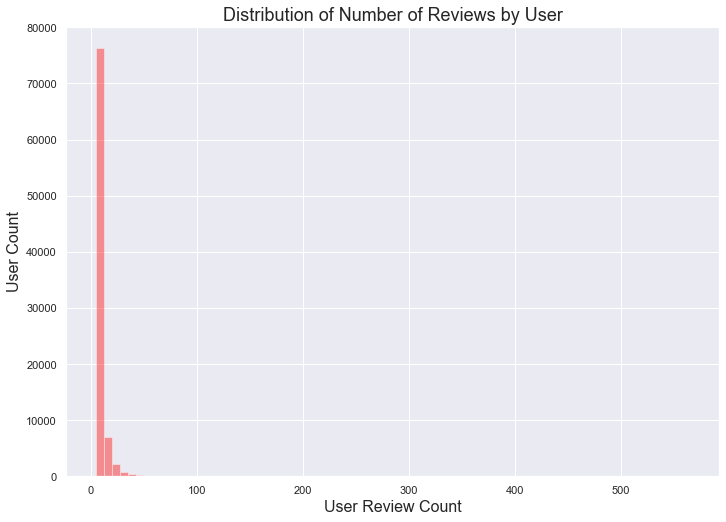

In [58]:
# Visualize the distribution of Review Counts

review_count = app_df.groupby('reviewerID').count()
figure = sns.distplot(review_count['asin'], kde=False, color='red', bins=75)
plt.title('Distribution of Number of Reviews by User', fontsize=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('User Review Count', fontsize=16)
plt.ylabel('User Count', fontsize=16);

In [67]:
# lets look at this with more detail
max = review_count.asin.max()
min = review_count.asin.min()
average = review_count.asin.mean()
median = review_count.asin.median()

print(f"The max number of reviews by user is {max} and the min number of reviews by user is {min}")
print(f"The average number of reviews by user is {average} and the median number of reviews by user is {median}")

The max number of reviews by user is 565 and the min number of reviews by user is 5
The average number of reviews by user is 8.627573879066356 and the median number of reviews by user is 7.0


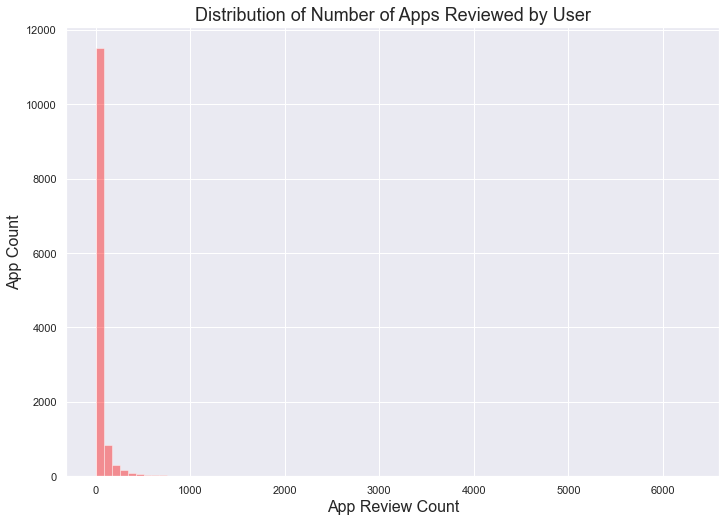

In [59]:
# Visualize the distribution of apps reviewed
app_count = app_df.groupby('asin').count()

figure = sns.distplot(app_count['reviewerID'], kde=False, color='red', bins=75)
plt.title('Distribution of Number of Apps Reviewed by User', fontsize=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('App Review Count', fontsize=16)
plt.ylabel('App Count', fontsize=16);

In [70]:
# Lets look at this distribution in more detail
max = app_count.reviewerID.max()
min = app_count.reviewerID.min()
average = app_count.reviewerID.mean()
median = app_count.reviewerID.median()

print(f"The max number of reviews for apps is {max} and the min number of reviews for apps is {min}")
print(f"The average number of reviews for apps is {round(average, 3)} and the median number of reviews for apps is {median}")

The max number of reviews for apps is 6282 and the min number of reviews for apps is 5
The average number of reviews for apps is 57.002 and the median number of reviews for apps is 14.0


In [51]:
app_count

,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
asin,,,,,,,,
B004A9SDD8,17,17,17,17,17,17,17,17
B004AFQAUA,62,61,62,62,62,62,62,62
B004AHBBPW,96,96,96,96,96,96,96,96
B004ALVL6W,95,95,95,95,95,95,95,95
B004AMAIZQ,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...
B00LITLOMK,7,7,7,7,7,7,7,7
B00LMLW8T2,6,6,6,6,6,6,6,6
B00LMLXTJK,5,5,5,5,5,5,5,5
